In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import librosa
from librosa import display

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
import time
import os
path = '/content/drive/My Drive/Colab_Notebooks/dataset/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      # print(file)
      try:
        #Load librosa array, get mfcc
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        #  converts the labels (from 1 to 8) to a series from 0 to 7
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)

      except ValueError:  # handling errors
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 614.7123544216156 seconds ---


In [ ]:
X, Y = zip(*lst)  # unzipping the lst to the features and index of emotion

In [ ]:
# convert input into array
import numpy as np
X = np.asarray(X)
Y = np.asarray(Y)
print(X.shape, Y.shape)

(2452, 40) (2452,)


In [ ]:
# saving the Variables to drive
import joblib
X2 = 'X2.joblib'
Y2 = 'Y2.joblib'
save_dir = '/content/drive/My Drive/Colab_Notebooks/XandY'
savedX = joblib.dump(X, os.path.join(save_dir, X2))
savedY = joblib.dump(Y, os.path.join(save_dir, Y2))

In [ ]:
# loading variables
import joblib
X = joblib.load('/content/drive/My Drive/Colab_Notebooks/XandY/X2.joblib')
Y = joblib.load('/content/drive/My Drive/Colab_Notebooks/XandY/Y2.joblib')

In [ ]:
# loading model from drive
load_gendermodel=keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/gender2.h5')
load_gendermodel.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_89 (Conv1D)           (None, 40, 256)           1536      
_________________________________________________________________
activation_108 (Activation)  (None, 40, 256)           0         
_________________________________________________________________
dropout_85 (Dropout)         (None, 40, 256)           0         
_________________________________________________________________
max_pooling1d_74 (MaxPooling (None, 10, 256)           0         
_________________________________________________________________
conv1d_90 (Conv1D)           (None, 10, 128)           163968    
_________________________________________________________________
activation_109 (Activation)  (None, 10, 128)           0         
_________________________________________________________________
dropout_86 (Dropout)         (None, 10, 128)         

In [ ]:
t=load_gendermodel.predict_classes(np.expand_dims(X, axis=2)) # gender predictions of feature

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# adding gender feature to existing features
count=int(0)
temp=[]
for i in X:
  arr = np.array([t[count]])
  temp.append(np.append(i,arr))
  print(np.append(i,arr))
  count+=1  
X = np.array(temp)
X

Streaming output truncated to the last 5000 lines.
  0.00000000e+00]
[-5.86595703e+02  3.26095695e+01 -2.80070934e+01  1.00452919e+01
 -2.01208324e+01 -1.74520092e+01 -1.28273182e+01 -1.60296135e+01
 -1.31419516e+01 -5.89156628e-01 -1.56422815e+01 -2.32373333e+00
 -8.67889500e+00 -2.33754694e-01 -7.76182699e+00  3.37368667e-01
 -2.79034710e+00  5.46655226e+00  5.98862314e+00  1.34083214e+01
  1.28221626e+01  9.28738976e+00  3.26320267e+00  1.35483891e-02
 -6.81072855e+00 -1.45409733e-01  7.73896694e-01 -2.22002983e+00
 -6.85325718e+00 -6.07158089e+00 -4.17047501e+00  3.65254450e+00
 -2.33178616e+00 -2.70696759e+00 -1.68444979e+00  2.98976034e-01
  3.18808816e-02 -9.92623389e-01  2.42870736e+00  5.12002659e+00
  0.00000000e+00]
[-6.30032410e+02  3.19908466e+01 -3.13259277e+01  7.32086420e+00
 -2.23059139e+01 -1.64710617e+01 -1.19562349e+01 -1.78151226e+01
 -1.19763250e+01 -3.35914946e+00 -1.47120533e+01 -1.67684484e+00
 -1.36839714e+01 -2.39002991e+00 -1.02961731e+01 -2.42860675e+00
 -3

array([[-4.43564758e+02,  3.20411186e+01, -3.09851379e+01, ...,
        -9.30567503e-01,  9.35208619e-01,  0.00000000e+00],
       [-5.18370361e+02,  2.99878311e+01, -3.11703968e+01, ...,
        -3.49008501e-01,  1.78264987e+00,  0.00000000e+00],
       [-5.96865173e+02,  3.86196022e+01, -2.52875957e+01, ...,
         2.40095243e-01,  2.70176172e+00,  0.00000000e+00],
       ...,
       [-7.48216003e+02,  7.78712616e+01,  7.43631983e+00, ...,
        -9.99257505e-01,  2.66650057e+00,  1.00000000e+00],
       [-7.61191345e+02,  7.68151703e+01,  1.36721373e+00, ...,
         8.34639966e-01,  4.07678318e+00,  1.00000000e+00],
       [-4.19313385e+02,  4.37958527e+01, -1.49616556e+01, ...,
         8.77419531e-01,  2.67450452e+00,  1.00000000e+00]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)
print(x_traincnn.shape, x_testcnn.shape)

(1642, 41, 1) (810, 41, 1)


In [ ]:
'''
# designing model
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',input_shape=(21,1)))        #1
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))



model.add(Conv1D(128, 5,padding='same',))                           #2
model.add(Activation('relu'))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(8))                                                 #3
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)
'''

In [ ]:
# designing model
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(41,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(64, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 41, 256)           1536      
_________________________________________________________________
activation_4 (Activation)    (None, 41, 256)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 41, 256)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 256)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 128)           163968    
_________________________________________________________________
activation_5 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 128)          

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
fitcnn=model.fit(x_traincnn, Y_train, batch_size=20, epochs=500, validation_data=(x_testcnn, Y_test))

Epoch 1/500
83/83 [==============================] - 3s 30ms/step - loss: 6.1544 - accuracy: 0.1525 - val_loss: 2.4429 - val_accuracy: 0.1963
Epoch 2/500
83/83 [==============================] - 2s 26ms/step - loss: 3.0085 - accuracy: 0.1727 - val_loss: 2.1329 - val_accuracy: 0.1753
Epoch 3/500
83/83 [==============================] - 2s 25ms/step - loss: 2.3564 - accuracy: 0.1736 - val_loss: 1.9904 - val_accuracy: 0.2247
Epoch 4/500
83/83 [==============================] - 2s 25ms/step - loss: 2.1909 - accuracy: 0.1643 - val_loss: 1.9790 - val_accuracy: 0.2099
Epoch 5/500
83/83 [==============================] - 2s 25ms/step - loss: 2.0907 - accuracy: 0.1562 - val_loss: 1.9890 - val_accuracy: 0.2296
Epoch 6/500
83/83 [==============================] - 2s 25ms/step - loss: 2.0450 - accuracy: 0.1871 - val_loss: 1.9781 - val_accuracy: 0.2284
Epoch 7/500
83/83 [==============================] - 2s 25ms/step - loss: 2.0523 - accuracy: 0.1747 - val_loss: 1.9707 - val_accuracy: 0.1889
Epoch 

In [ ]:
# prediction
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
p = model.predict_classes(x_testcnn)
print(classification_report(Y_test,p))
print(confusion_matrix(Y_test,p)) # confusion matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.58      0.56      0.57        64
           1       0.51      0.98      0.67       119
           2       0.72      0.62      0.67       130
           3       0.69      0.53      0.60       122
           4       0.88      0.71      0.79       126
           5       0.77      0.60      0.68       116
           6       0.58      0.51      0.54        67
           7       0.59      0.52      0.55        66

    accuracy                           0.65       810
   macro avg       0.66      0.63      0.63       810
weighted avg       0.68      0.65      0.65       810

[[ 36  25   0   3   0   0   0   0]
 [  1 117   0   0   0   1   0   0]
 [  1  30  81   2   1   7   4   4]
 [ 13  26   4  65   0   7   4   3]
 [  1   5   7   3  90   2  12   6]
 [  6   5   5  19   4  70   4   3]
 [  2  13   3   0   5   2  34   8]
 [  2  10  13   2   2   2   1  34]]


In [ ]:
# accuracy
loss, acc = model.evaluate(x_traincnn, Y_train, verbose = 0)
print("train accuracy: {:5.2f}% ".format(100*acc))
testloss, testacc = model.evaluate(x_testcnn, Y_test, verbose = 0)
print("test accuracy: {:5.2f}% ".format(100*testacc))

train accuracy: 85.75% 
test accuracy: 65.06% 


In [ ]:
# saving model to drive
model.save('/content/drive/MyDrive/Colab_Notebooks/speechemotionmodel3.h5')

In [2]:
import keras
import librosa
from librosa import display
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# loading model from drive
load_model=keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/speechemotionmodel3.h5')
load_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 41, 256)           1536      
_________________________________________________________________
activation_4 (Activation)    (None, 41, 256)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 41, 256)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 256)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 128)           163968    
_________________________________________________________________
activation_5 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 128)          

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
# final testing data 
std = StandardScaler()
GENDER=None
def feature(filename):
  path = '/content/drive/My Drive/Colab_Notebooks/dataset/'+ filename
  x, sr = librosa.load(path, res_type='kaiser_fast')
  mfccstest = np.mean(librosa.feature.mfcc(y=x, sr=sr, n_mfcc=40).T,axis=0) 
  lst=[mfccstest.tolist()]
  x = np.asarray(lst)
  # #Scaling the features
  # x = std.fit_transform(x)
  return x


In [6]:
def gender_recog(x2):

  # loading model from drive
  temp = np.expand_dims(x2, axis=2)
  load_gendermodel=keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/gender2.h5')
  global GENDER
  GENDER=load_gendermodel.predict_classes(np.expand_dims(x2, axis=2)) # gender predictions of feature
  count=int(0)
  temp_p=[]
  for i in x2:
    arr = np.array([GENDER[count]])
    temp_p.append(np.append(i,arr))
    count+=1  
  x2 = np.array(temp_p)
  x1 = np.expand_dims(x2, axis=2)
  return x1

def predict(data):
  return gender_recog(feature(data))

In [7]:
# emotion for every index value 
def emotion(pred):

        label_conversion = {'0': 'neutral',
                            '1': 'calm',
                            '2': 'happy',
                            '3': 'sad',
                            '4': 'angry',
                            '5': 'fearful',
                            '6': 'disgust',
                            '7': 'surprised'}

        for key, value in label_conversion.items():
            if int(key) == pred:
                label = value
        return label
def gender(G):
  if G[0]==0:
    return "female"
  else:
    return "male"

In [8]:
data='03-01-07-01-01-01-19.wav'
prediction = load_model.predict_classes(predict(data))
print("Prediction is ", gender(GENDER),emotion(prediction))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction is  male disgust


In [9]:
path = '/content/drive/My Drive/Colab_Notebooks/dataset/03-01-07-01-01-01-19.wav'

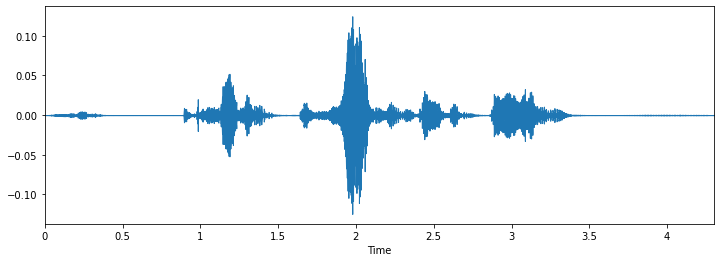

In [10]:
plt.figure(figsize=(12, 4))
x, sr = librosa.load(path, res_type='kaiser_fast')
librosa.display.waveplot(x, sr=sr)